<h2>K-Nearest Neighbour Classification</h2>

In [5]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as plt

In [6]:
# Read in datasets for X
X_train = pd.read_fwf("~/data/X_train.txt", colspecs='infer', header=None)
X_test = pd.read_fwf("~/data/X_test.txt", colspecs='infer', header=None)

print("Training instances:\t", len(X_train.index),
     "\nTesting instances:\t", len(X_test.index),
     "\nTraining features:\t", len(X_train.columns),
     "\nTesting features:\t", len(X_test.columns))

Training instances:	 7352 
Testing instances:	 2947 
Training features:	 561 
Testing features:	 561


In [7]:
# Read in datasets for Y
Y_train = pd.read_fwf("~/data/y_train.txt", colspecs='infer', header=None)
Y_test = pd.read_fwf("~/data/y_test.txt", colspecs='infer', header=None)

print("Training instances:\t", len(Y_train.index),
     "\nTesting instances:\t", len(Y_test.index),
     "\nTraining features:\t", len(Y_train.columns),
     "\nTesting features:\t", len(Y_test.columns))

Training instances:	 7352 
Testing instances:	 2947 
Training features:	 1 
Testing features:	 1


In [8]:
# Look at the labels of the dataset
labels = pd.read_fwf("~/data/activity_labels.txt", colspecs='infer', header=None)
print(labels)

   0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
5  6              LAYING


<h4>Let K take values from 1 to 50. For choosing the best K, use 10-fold cross-validation. Choose the best value of K based on model F1-score.</h4>

In [9]:
# Import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [14]:
# Hide Sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Set K to values 1 to 50
K_values = range(1,51)

# Initialise to store results
results = []
best_k = 0
best_f1 = 0

# Loop through all K_values for KNN and store in results (include f1_macro and accuracy)
for number in K_values:
    KNN = KNeighborsClassifier(n_neighbors=number)
    result = cross_val_score(KNN, X_train, Y_train, cv=10, scoring='f1_macro')
    results.append(result.mean())

for index, item in enumerate(results):
    if item == max(results):
        best_k = index + 1 # As indexes start from zero in Python
        best_f1 = item
        print("The best value of K based on model F1-score is ", best_f1,
              "\nThis value is for K = ", best_k)

The best value of K based on model F1-score is  0.9095690552251193 
This value is for K =  10


<h4>Show a plot of cross-validation accuracy with respect to K.</h4>

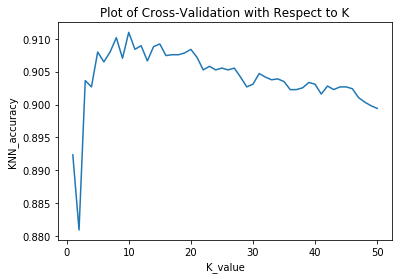

In [14]:
# Import packages
import matplotlib.pyplot as plt

# Build accuracy array
KNN_accuracy = []

for number in K_values:
    KNN = KNeighborsClassifier(n_neighbors=number)
    KNN_result = cross_val_score(KNN, X_train, Y_train, cv=10, scoring='accuracy')
    KNN_accuracy.append(KNN_result.mean())

# Build the plot
plt.plot(K_values, KNN_accuracy)
plt.title('Plot of Cross-Validation with Respect to K')
plt.xlabel('K_value')
plt.ylabel('KNN_accuracy')
plt.show()

<h4>Using the best K value, evaluate the model performance on the supplied test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.</h4>

In [27]:
# Using the best value for K
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
best_K_KNN_accuracy = cross_val_score(KNN_best, X_train, Y_train, cv=10, scoring='accuracy')
best_K_KNN_f1_macro = cross_val_score(KNN_best, X_train, Y_train, cv=10, scoring='f1_macro')

In [28]:
# Fit and predict
KNN_best.fit(X_train, Y_train)
predict = KNN_best.predict(X_test)

In [34]:
# Import packages and calculate
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(Y_test, predict)

In [36]:
# Multi-class average F1 and accuracy
print('Multi-class average F1: ', fscore.mean(),
      '\nMulti-class accuracy : ', accuracy_score(Y_test,predict))

Multi-class average F1:  0.9013800312675501 
Multi-class accuracy :  0.9043094672548354


In [25]:
# Confusion matrix
print(confusion_matrix(Y_test, predict))

[[486   0  10   0   0   0]
 [ 39 427   5   0   0   0]
 [ 52  41 327   0   0   0]
 [  0   4   0 408  79   0]
 [  0   0   0  48 484   0]
 [  0   0   0   2   2 533]]


<h2>Multiclass Logistic Regression with Elastic Net</h2>

Build an elastic-net regularized logistic regression classfier for this data.
•  Elastic-net regularizer takes in 2 parameters: alpha and l1-ratio. Use the following values for alpha:
1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2. Use the following values for l1-ratio: 0,0.15,0.5,0.7,1.

In [ ]:
# Import libraries
from sklearn import linear_model
from sklearn import grid_search

# Build classifier and parameters
classifier = linear_model.SGDClassifier(penalty='elasticnet')

parameters = {
    'alpha':[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03], 
    'l1_ratio':[0, 0.15, 0.5, 0.7, 1]
}

# User gridsearch to build and fit our model
model = grid_search.GridSearchCV(estimator=classifier, param_grid=parameters, cv=10, scoring='f1_macro')

In [ ]:
print(X_train.shape, Y_train.shape)
print(type(X_train), type(Y_train))

In [72]:
# Convert to numpy array to be able to fit with the model
Y_train = Y_train.values
Y_train = Y_train.reshape(7352,)
Y_test = Y_test.values
Y_test = Y_test.reshape(2947,)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [74]:
# Fit the model
model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03], 'l1_ratio': [0, 0.15, 0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_macro', verbose=0)

In [81]:
print("Best estimator alpha: \t", model.best_estimator_.alpha,
      "\nBest estimator l1: \t", model.best_estimator_.l1_ratio)

Best estimator alpha: 	 0.003 
Best estimator l1: 	 0.15


Choose the best values of alpha and l1-ratio using 10-fold cross-validation, based on model F1-score

In [156]:
# Iterate through and pull out maximum mean alpha and l1_ratio
means = []
alpha = []
l1_ratio = []
number = 0

# Loop through to get maximum
for number in range(0,30):
    means.append(float(str(model.grid_scores_[number]).split(' ')[1][:-1]))
    alpha.append(float(str(model.grid_scores_[number]).split(' ')[6][:-1]))
    l1_ratio.append(float(str(model.grid_scores_[number]).split(' ')[8][:-1]))
    
# Loop through to grab the alpha and l1 ratio for the maximum
for index, item in enumerate(means):
    if item == max(means):
        best_alpha = float(str(model.grid_scores_[index]).split(' ')[6][:-1])
        best_l1 = float(str(model.grid_scores_[index]).split(' ')[8][:-1])
        print("Max mean : \t", max(means),
              "\nBest alpha :\t", best_alpha,
              "\nBest L1 : \t", best_l1)

Max mean : 	 0.93689 
Best alpha :	 0.003 
Best L1 : 	 0.15


Draw a surface plot of F1-score with respect to alpha and l1-ratio values.

In [144]:
# Import packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

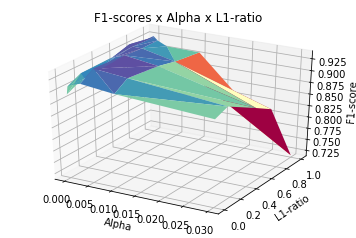

In [155]:
# Build and plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(alpha, l1_ratio, means, linewidth=0.1, antialiased=True,cmap=plt.cm.Spectral)
ax.set_xlabel('Alpha')
ax.set_ylabel('L1-ratio')
ax.set_zlabel('F1-score')
plt.title('F1-scores x Alpha x L1-ratio')
plt.show()

Use the best value of alpha and l1-ratio to re-train the model on the training set and use it to predict
the labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

In [162]:
# Build the best model
best_model = SGDClassifier(alpha=best_alpha,l1_ratio=best_l1,random_state=100)

# Fit the model
best_model.fit(X_train, Y_train)

# Predict test labels
predicted = best_model.predict(X_test)

# Use on test data
precision, recall, fscore, support = precision_recall_fscore_support(Y_test, predicted)

# Plot confusion matrix
print("Confusion matrix\n", confusion_matrix(Y_test, predicted),
      "\nF1-Score:\t", fscore.mean(),
      "\nAccuracy:\t", accuracy_score(Y_test, predicted))

Confusion matrix
 [[492   0   4   0   0   0]
 [ 33 434   4   0   0   0]
 [  8  12 400   0   0   0]
 [  0   5   0 432  54   0]
 [  2   0   0  23 507   0]
 [  0   0   0   0   0 537]] 
F1-Score:	 0.9505115902601952 
Accuracy:	 0.9507974211062097


<h2>Support Vector Machine (RBF Kernel)</h2>

Build a SVM (with RBF Kernel) classfier for this data.
•  SVM with RBF takes 2 parameters: gamma (length scale of the RBF kernel) and C (the cost
parameter). Use the following values for gamma: 1e-3, 1e-4. Use the following values for C: 1, 10,
100, 1000.

In [164]:
# Import packages
from sklearn import svm

# Build Support Vector Machine
svm_rbf = svm.SVC(kernel='rbf')

# Build parameter dictionary
parameters = {'C':[1,10,100,1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

# Build SVM model
svm_model = grid_search.GridSearchCV(estimator=svm_rbf, param_grid=parameters, cv=10, scoring='f1_macro')

# Fit the model
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_macro', verbose=0)

Choose the best values of gamma and C using 10-fold cross-validation, based on model F1-score.

In [169]:
# Iterate through and find the best value
means = []
Cs = []
gamma = []
number = 0

# Loop through to get maximum
for number in range(0,8):
    means.append(float(str(svm_model.grid_scores_[number]).split(' ')[1][:-1]))
    Cs.append(float(str(svm_model.grid_scores_[number]).split(' ')[6][:-1]))
    gamma.append(float(str(svm_model.grid_scores_[number]).split(' ')[8][:-1]))
    
# Loop through to grab the alpha and l1 ratio for the maximum
for index, item in enumerate(means):
    if item == max(means):
        best_C = float(str(svm_model.grid_scores_[index]).split(' ')[6][:-1])
        best_gamma = float(str(svm_model.grid_scores_[index]).split(' ')[8][:-1])
        print("Best accuracy : \t", max(means),
              "\nBest Cs :\t\t", best_C,
              "\nBest gamma : \t\t", best_gamma)

Best accuracy : 	 0.94954 
Best Cs :		 1000.0 
Best gamma : 		 0.001


Draw a surface plot of F1-score with respect to gamma and C.

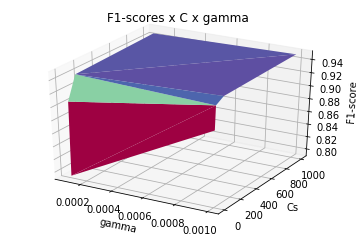

In [171]:
# Build and plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(gamma, Cs, means, linewidth=0.1, antialiased=True,cmap=plt.cm.Spectral)
ax.set_xlabel('gamma')
ax.set_ylabel('Cs')
ax.set_zlabel('F1-score')
plt.title('F1-scores x C x gamma')
plt.show()

Use the best value of gamma and C to re-train the model on the training set and use it to predict the
labels of the test set. Report the confusion matrix, multi-class averaged F1-score and accuracy.

In [172]:
# Build new "best" model
svm_best = svm.SVC(C=best_C, gamma=best_gamma, kernel='rbf')

# Fit the model
svm_best.fit(X_train, Y_train)

# Predict labels
predicted = svm_best.predict(X_test)

# Collect model information
precision, recall, fscore, support = precision_recall_fscore_support(Y_test, predicted)

# Show the performance
print("Confusion matrix\n", confusion_matrix(Y_test, predicted),
      "\nF1-Score:\t", fscore.mean(),
      "\nAccuracy:\t", accuracy_score(Y_test, predicted))

Confusion matrix
 [[491   0   5   0   0   0]
 [ 17 453   1   0   0   0]
 [  3  10 407   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]] 
F1-Score:	 0.9646907009320964 
Accuracy:	 0.9647098744485918


<h2>Random Forest</h2>

Build a Random forest classifier for this data.
•  Random forest uses two parameters: the tree-depth for each decision tree and the number of trees.
Use the following values for the tree-depth: 300,500,600. Use the following values for the number of
trees: 200,500,700.

In [175]:
# Import packages
from sklearn.ensemble import RandomForestClassifier

# Initialise classifier
RFC = RandomForestClassifier()

# Build parameters for gridsearchCV
parameters = {'max_depth': [300, 500, 600],'n_estimators': [200, 500, 700]}

# Build model
RFC_model = grid_search.GridSearchCV(RFC, parameters, cv=10, scoring='f1_macro')

# Fit the model
RFC_model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [300, 500, 600], 'n_estimators': [200, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_macro', verbose=0)

Choose the best values of tree-depth and number of trees using 10-fold cross-validation, based on
model F1-score.

In [176]:
RFC_model.grid_scores_

[mean: 0.92736, std: 0.04849, params: {'max_depth': 300, 'n_estimators': 200},
 mean: 0.92848, std: 0.04868, params: {'max_depth': 300, 'n_estimators': 500},
 mean: 0.92856, std: 0.04659, params: {'max_depth': 300, 'n_estimators': 700},
 mean: 0.92871, std: 0.04647, params: {'max_depth': 500, 'n_estimators': 200},
 mean: 0.92905, std: 0.04487, params: {'max_depth': 500, 'n_estimators': 500},
 mean: 0.92871, std: 0.04634, params: {'max_depth': 500, 'n_estimators': 700},
 mean: 0.92491, std: 0.04560, params: {'max_depth': 600, 'n_estimators': 200},
 mean: 0.92971, std: 0.04713, params: {'max_depth': 600, 'n_estimators': 500},
 mean: 0.92909, std: 0.04679, params: {'max_depth': 600, 'n_estimators': 700}]

In [178]:
# Iterate through and find the best value
means = []
tree_depth = []
trees = []
number = 0

# Loop through to get maximum
for number in range(0,9):
    means.append(float(str(RFC_model.grid_scores_[number]).split(' ')[1][:-1]))
    tree_depth.append(float(str(RFC_model.grid_scores_[number]).split(' ')[6][:-1]))
    trees.append(float(str(RFC_model.grid_scores_[number]).split(' ')[8][:-1]))
    
# Loop through to grab the alpha and l1 ratio for the maximum
for index, item in enumerate(means):
    if item == max(means):
        best_depth = float(str(RFC_model.grid_scores_[index]).split(' ')[6][:-1])
        best_num_trees = float(str(RFC_model.grid_scores_[index]).split(' ')[8][:-1])
        print("Best accuracy : \t", max(means),
              "\nBest depth :\t\t", best_depth,
              "\nBest number of trees : \t", best_num_trees)

Best accuracy : 	 0.92971 
Best depth :		 600.0 
Best number of trees : 	 500.0


Draw a surface plot of F1-score with respect to tree-depth and number of trees.

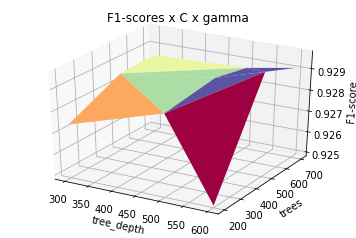

In [179]:
# Build and plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(tree_depth, trees, means, linewidth=0.1, antialiased=True,cmap=plt.cm.Spectral)
ax.set_xlabel('tree_depth')
ax.set_ylabel('trees')
ax.set_zlabel('F1-score')
plt.title('F1-scores x C x gamma')
plt.show()

Use the best value of tree-depth and number of trees to re-train the model on the training set and
use it to predict the labels of the test set. Report the confusion matrix, multi-class averaged F1-score
and accuracy.

In [181]:
# Build new "best" model
RFC_best = RandomForestClassifier(n_estimators=int(best_num_trees), max_depth=best_depth, random_state=100)

# Fit the model
RFC_best.fit(X_train, Y_train)

# Predict labels
predicted = RFC_best.predict(X_test)

# Collect model information
precision, recall, fscore, support = precision_recall_fscore_support(Y_test, predicted)

# Show the performance
print("Confusion matrix\n", confusion_matrix(Y_test, predicted),
      "\nF1-Score:\t", fscore.mean(),
      "\nAccuracy:\t", accuracy_score(Y_test, predicted))

Confusion matrix
 [[483   5   8   0   0   0]
 [ 32 432   7   0   0   0]
 [ 21  44 355   0   0   0]
 [  0   0   0 433  58   0]
 [  0   0   0  50 482   0]
 [  0   0   0   0   0 537]] 
F1-Score:	 0.9217857480862691 
Accuracy:	 0.9236511706820495


<h2>Discussion</h2>

<table>
  <tr>
    <th>Method</th>
    <th>F1</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>KNN</td>
    <td>0.9014</td>
    <td>0.9043</td>
  </tr>
  <tr>
    <td>LR with elastic net</td>
    <td>0.9505</td>
    <td>0.9508</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.9647</td>
    <td>0.9647</td>
  </tr>
  <tr>
    <td>Random forest</td>
    <td>0.9218</td>
    <td>0.9237</td>
  </tr>
</table> 

The best performance was achieved by the SVM model using the RBF kernel with C of 1000, and gamma of 0.001. Accuracy for this model on training data was 0.94954, showing an increase from training to testing accuracy by around 1.5%. The high accuracy result was due to the model allowing high freedom for the selection of samples as support vectors.

Lowest F1 score and accuracy was attained on the KNN model at 0.9014, and 0.9043 respectively.

Using a multiclass SVM the paper attained 96% accuracy, which is the same as attained through my SVM model. The difference being Anguita et al. (2013) used a one-versus-all approach, whilst my model used cross validation.

To increase accuracy a higher value of 'C' can be used, but this could lead to overfitting and make the model less generalised and less applicable across future expected datasets. The use of an ensemble method can be added through a pipeline to ensure outliers are taken care of prior to the SVM.


<h3>References:</h3>

Anguita, D., Ghio, Al., Oneto, L., Parra, X. & Reyes-Ortiz, J.L. (2013). A Public Domain Dataset for Human Activity Recognition Using Smartphones. ESANN 2013 proceedings, European Symposion on Artificial Neural Networks, Computational Intelligence and Machine Learning. Bruges (Belgium), 24-26 April 2013.